In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,accuracy_score,confusion_matrix

In [9]:
data=pd.read_csv("/content/drive/MyDrive/ML Lab test/Datasets/Play_Tennis.csv")

In [10]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [16]:
le=LabelEncoder()

In [17]:
data['eoutlook']=le.fit_transform(data['outlook'])
data['etemp']=le.fit_transform(data['temp'])
data['ehumidity']=le.fit_transform(data['humidity'])
data['ewindy']=le.fit_transform(data['windy'])
data['eplay']=le.fit_transform(data['play'])

In [19]:
X=data[['eoutlook','etemp','ehumidity','ewindy']]
y=data['eplay']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
dtc=DecisionTreeClassifier()

In [22]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
predictions=dtc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


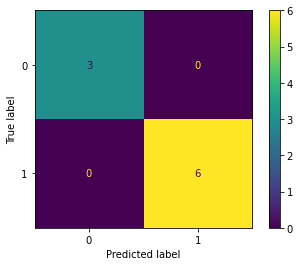

In [25]:
plot_confusion_matrix(dtc,X_train,y_train)

In [26]:
from sklearn import tree

In [27]:
trail=tree.export_graphviz(dtc)

In [28]:
import graphviz

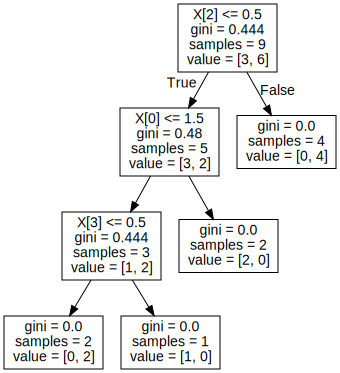

In [29]:
graphviz.Source(trail,format='png')

In [30]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'X[2] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.5, 0.625, 'X[0] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

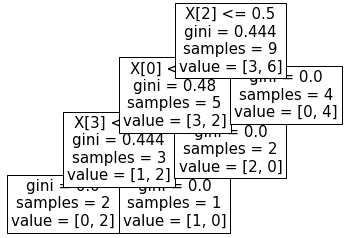

In [33]:
plot_tree(dtc,fontsize=15)